# Search Space Statistics

In the following we create plots to visualize statistics of the search spaces for single-label classification and multi-label classification.

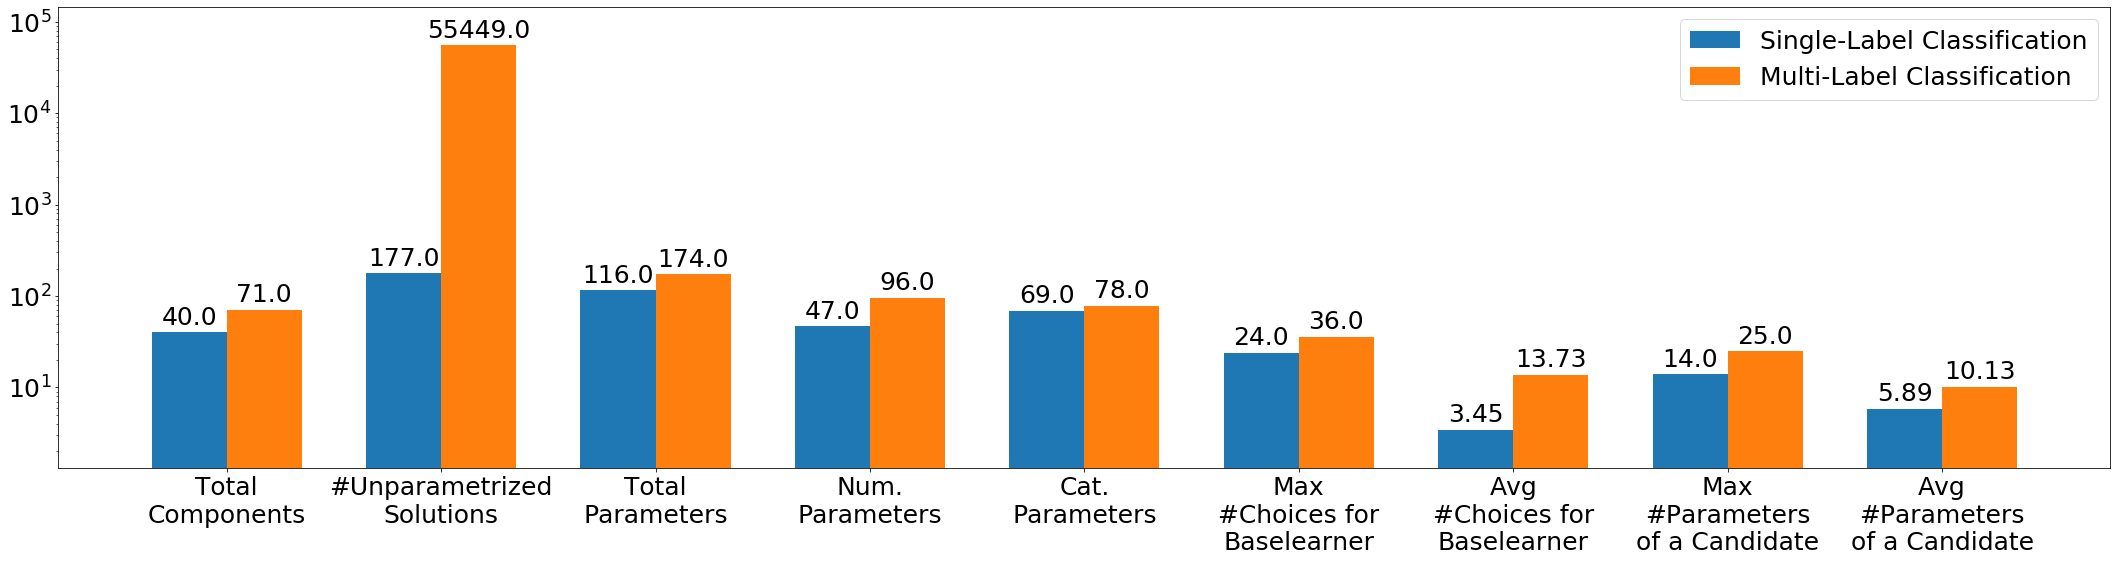

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

size=25

plt.rc('xtick', labelsize=size)
plt.rc('ytick', labelsize=size)

labels = ['Total\nComponents', '#Unparametrized\nSolutions', 'Total\nParameters', 'Num.\nParameters', 'Cat.\nParameters', 'Max\n#Choices for\nBaselearner','Avg\n#Choices for\nBaselearner', 'Max\n#Parameters\nof a Candidate', 'Avg\n#Parameters\nof a Candidate']
slc = [40, 177, 116, 47, 69, 24, 3.45, 14, 5.89]
mlc = [71, 55449, 174, 96, 78, 36, 13.73, 25, 10.13]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(30,8))
rects1 = ax.bar(x - width/2, slc, width, label='Single-Label Classification')
rects2 = ax.bar(x + width/2, mlc, width, label='Multi-Label Classification')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=size)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size=size)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.margins(0.05,0.1)
plt.yscale("log")
#plt.show()
plt.savefig("searchspace-barchart.pdf")

# Incumbent Statistics

In the following we build pie charts based on the occurrence of algorithms in the final incumbents.

In [343]:
columns_meka_base=['BCC','BR','BRq','CCq','FW','LC','MCC','MLCBMaD','MajorityLabelset','PS','PSt','RAkEL','RAkELd','RT']
columns_weka_base=['NaiveBayesMultinomial','SMO','VotedPerceptron','IBk','OneR','J48','RandomForest','RandomTree']
columns_weka_meta=['ClassificationViaRegression','LogitBoost','RandomCommittee','RandomSubSpace','Vote','None']
columns_weka_kernel=['NormalizedPolyKernel']
columns_meka_meta=['BaggingML','BaggingMLdup','EnsembleML','MBR','RandomSubspaceML','SubsetMapper','None']

def labelDonut(ax, wedges, labels):
    print("In label Donut")
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
    
    print("Start for loop")
    for i, p in enumerate(wedges):
        print(i, p, labels[i])
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment, **kw)
    print("end of label Donut")
    
def pieChart(ax, data, labels, index):
    outer_colors = cmap(np.arange(25))
    size = 0.2
    
    for i in range(len(labels)):
        if data[i] <= 0.0:
            labels[i] = ''
    
    sum = np.array(data).sum()
    if sum < 1.0:
        data.append(1.0-sum)
        labels.append("Others")
    
    ax.pie(data, radius=1-index*size, colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w'), labels=labels, labeldistance=1-(index+1)*.07)

def printPychart(name, meka_meta, meka_base, weka_meta, weka_base, weka_kernel):
    columns_meka_base=['BCC','BR','BRq','CCq','FW','LC','MCC','MLCBMD','ML','PS','PSt','RAEL','RAEL','RT']
    columns_weka_base=['NBM','SMO','VP','IBk','OR','J48','RF','RT']
    columns_weka_meta=['CVR','LB','RC','RSS','V','/']
    columns_weka_kernel=['NPK', '/']
    columns_meka_meta=['BML','BML','EML','MBR','RSML','SM','/']

    fig, ax = plt.subplots(figsize=(15,15))
    cmap = plt.get_cmap("tab20c")
    
    pieChart(ax, meka_meta, columns_meka_meta, 0)
    pieChart(ax, meka_base, columns_meka_base, 1)
    pieChart(ax, weka_meta, columns_weka_meta, 2)
    pieChart(ax, weka_base, columns_weka_base, 3)
    pieChart(ax, weka_kernel, columns_weka_kernel, 4)
    
    plt.savefig(name+"-piechart.pdf", bbox_inches = 'tight', pad_inches = 0)




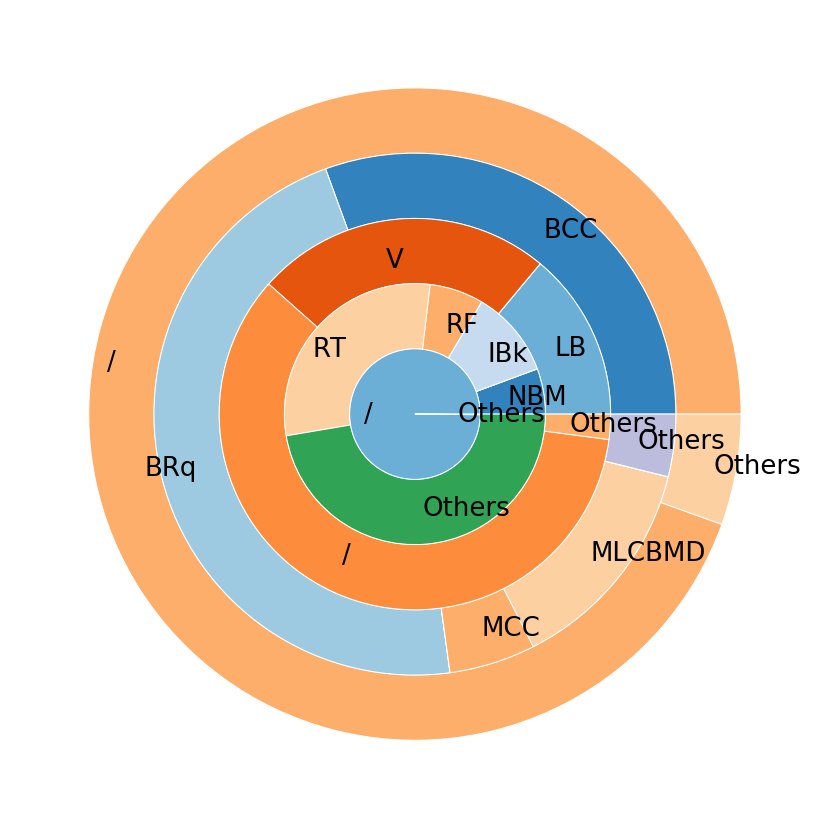

In [344]:
# GGP


meka_meta=[0.0,0.0,0.0,0.0,0.0,0.0,0.9451038575667656]
meka_base=[0.3056379821958457,0.0,0.4658753709198813,0.0,0.0,0.0,0.05341246290801187,0.13649851632047477,0.0,0.0,0.0,0.0,0.0,0.0]
weka_meta=[0.0,0.1394658753709199,0.0,0.0,0.24480712166172106,0.5949554896142433]
weka_base=[0.05637982195845697,0.0,0.0,0.1083086053412463,0.0,0.0,0.06676557863501484,0.2952522255192878]
weka_kernel=[0.0,0.9985163204747775]

printPychart("GGP", meka_meta, meka_base, weka_meta, weka_base, weka_kernel)

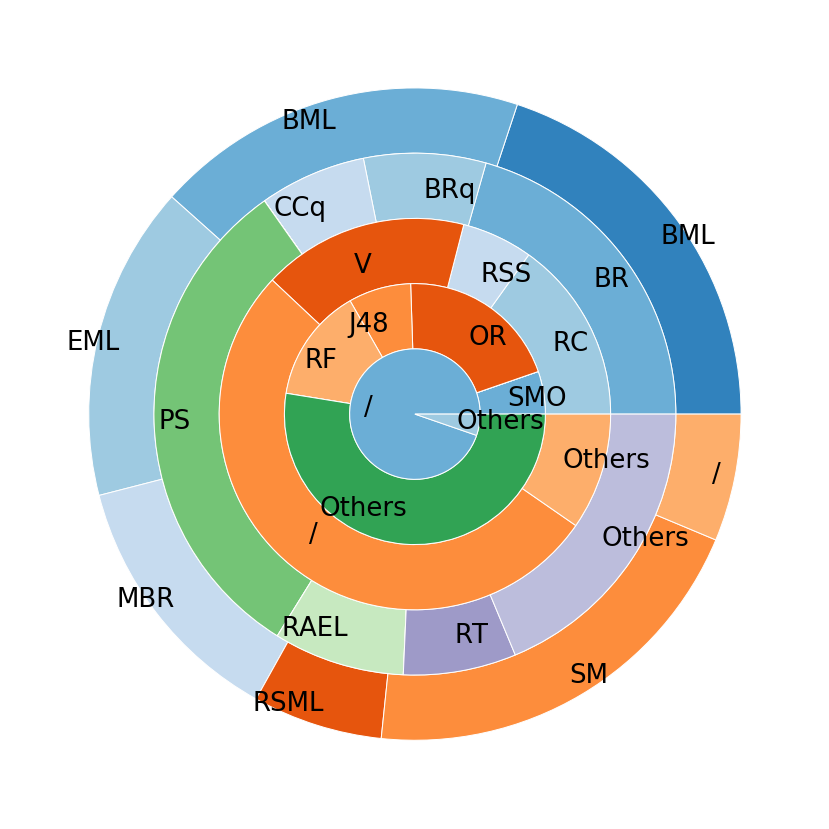

In [345]:
# RANDOM

meka_meta=[0.2627599243856333,0.2438563327032136,0.2060491493383743,0.17013232514177692,0.08506616257088846,0.2684310018903592,0.0831758034026465]
meka_base=[0.0,0.2060491493383743,0.07561436672967864,0.0661625708884688,0.0,0.0,0.0,0.0,0.0,0.31379962192816635,0.0,0.08128544423440454,0.0,0.06994328922495274]
weka_meta=[0.0,0.0,0.15122873345935728,0.05860113421550094,0.17013232514177692,0.5236294896030246]
weka_base=[0.0,0.052930056710775046,0.0,0.0,0.20226843100189035,0.07750472589792061,0.14177693761814744,0.0]
weka_kernel=[0.0,0.947069943289225]

printPychart("Random", meka_meta, meka_base, weka_meta, weka_base, weka_kernel)

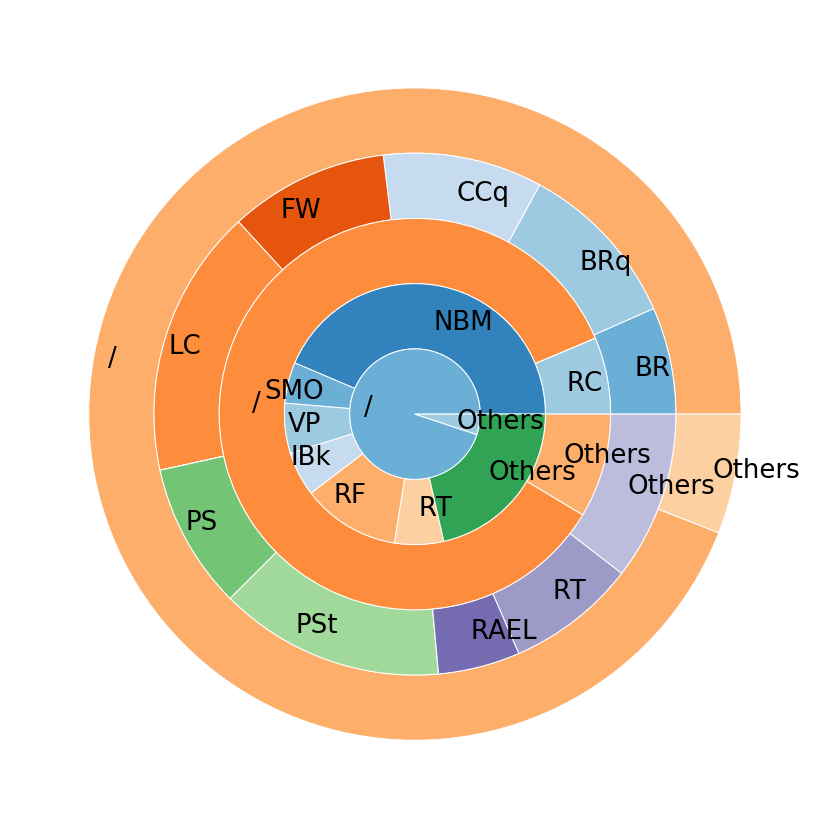

In [346]:
#BF 

meka_meta=[0.0,0.0,0.0,0.0,0.0,0.0,0.9407616361071932]
meka_base=[0.0,0.06629055007052186,0.10437235543018336,0.09873060648801128,0.09873060648801128,0.16643159379407615,0.0,0.0,0.0,0.09026798307475317,0.13963328631875882,0.0,0.05077574047954866,0.08039492242595205]
weka_meta=[0.0,0.0,0.06346967559943582,0.0,0.0,0.8504936530324401]
weka_base=[0.43582510578279265,0.05077574047954866,0.06205923836389281,0.05500705218617771,0.0,0.0,0.12129760225669958,0.06064880112834979]
weka_kernel=[0.0,0.9492242595204513]

printPychart("HTN-BF", meka_meta, meka_base, weka_meta, weka_base, weka_kernel)

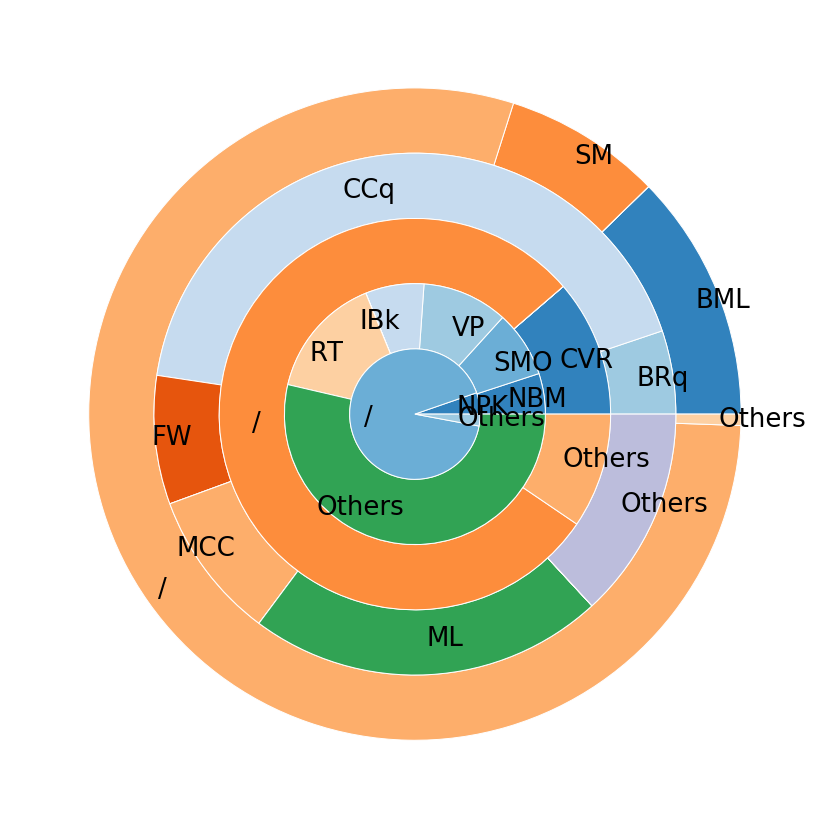

In [347]:
# SMAC

meka_meta=[0.12290502793296089,0.0,0.0,0.0,0.0,0.0782122905027933,0.7932960893854749]
meka_base=[0.0,0.0,0.051675977653631286,0.4245810055865922,0.07960893854748603,0.0,0.09217877094972067,0.0,0.2206703910614525,0.0,0.0,0.0,0.0,0.0]
weka_meta=[0.11312849162011174,0.0,0.0,0.0,0.0,0.7918994413407822]
weka_base=[0.05027932960893855,0.0824022346368715,0.10614525139664804,0.07262569832402235,0.0,0.0,0.0,0.15223463687150837]
weka_kernel=[0.05307262569832402,0.9175977653631285]


printPychart("SMAC", meka_meta, meka_base, weka_meta, weka_base, weka_kernel)

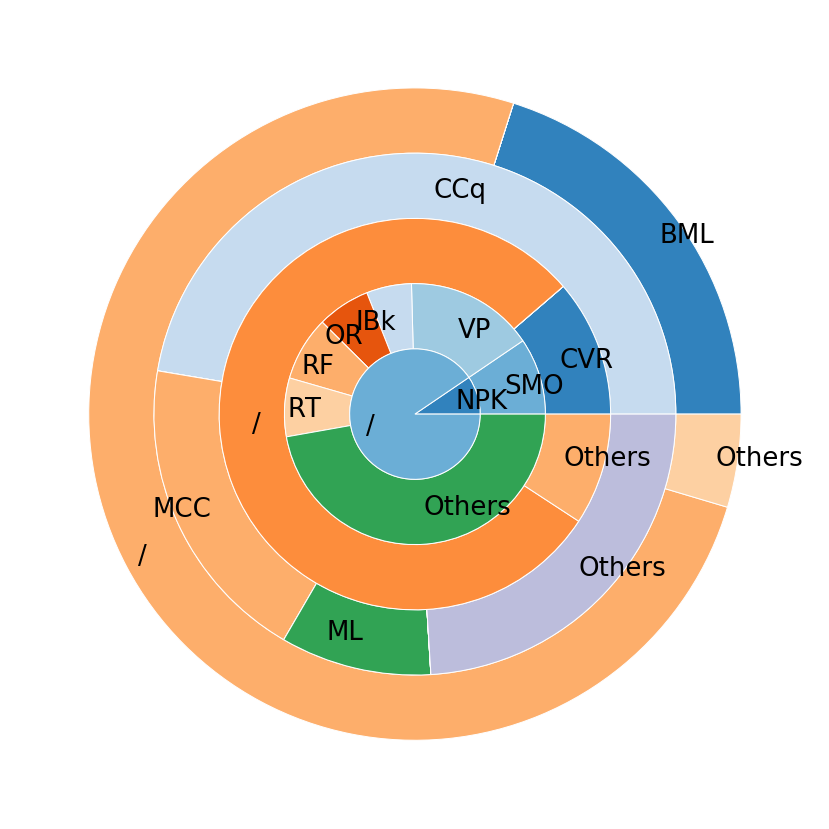

In [348]:
#BOHB

meka_meta=[0.2011173184357542,0.0,0.0,0.0,0.0,0.0,0.7527932960893855]
meka_base=[0.0,0.0,0.0,0.473463687150838,0.0,0.0,0.19273743016759776,0.0,0.0935754189944134,0.0,0.0,0.0,0.0,0.0]
weka_meta=[0.11312849162011174,0.0,0.0,0.0,0.0,0.7946927374301676]
weka_base=[0.0,0.09497206703910614,0.15921787709497207,0.055865921787709494,0.06564245810055866,0.0,0.07960893854748603,0.07262569832402235]
weka_kernel=[0.09497206703910614,0.9050279329608939]

printPychart("BOHB", meka_meta, meka_base, weka_meta, weka_base, weka_kernel)

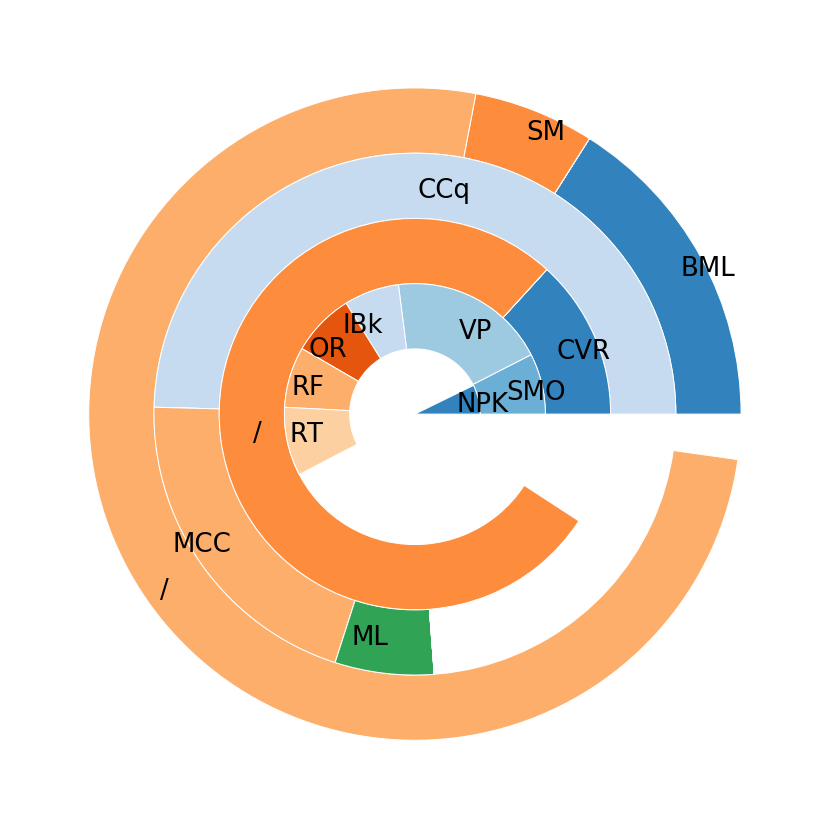

In [332]:
#HB

meka_meta=[0.16016713091922005,0.0,0.0,0.0,0.0,0.05988857938718663,0.7576601671309192]
meka_base=[0.0,0.0,0.0,0.4958217270194986,0.0,0.0,0.20473537604456823,0.0,0.06128133704735376,0.0,0.0,0.0,0.0,0.0]
weka_meta=[0.13231197771587744,0.0,0.0,0.0,0.0,0.775766016713092]
weka_base=[0.0,0.07520891364902507,0.19498607242339833,0.06824512534818941,0.07799442896935933,0.0,0.07520891364902507,0.08495821727019498]
weka_kernel=[0.07242339832869081,0.924791086350975]

printPychart("HB", meka_meta, meka_base, weka_meta, weka_base, weka_kernel)

In [336]:
import zipfile

print ('creating archive')
zf = zipfile.ZipFile('piecharts.zip', mode='w')
try:
    filesToAdd = [ 'BOHB-piechart.pdf', 'GGP-piechart.pdf', 'HB-piechart.pdf', 'HTN-BF-piechart.pdf','Random-piechart.pdf','SMAC-piechart.pdf' ]
    for fta in filesToAdd:
        print ("Write " + fta)
        zf.write(fta)
finally:
    print ('closing')
    zf.close()



creating archive
Write BOHB-piechart.pdf
Write GGP-piechart.pdf
Write HB-piechart.pdf
Write HTN-BF-piechart.pdf
Write Random-piechart.pdf
Write SMAC-piechart.pdf
closing
